<a href="https://colab.research.google.com/github/IA2021UR/entregable-1-joferne/blob/main/4_comparando_descriptores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. IMPORTACIÓN DE LIBRERÍAS** 

In [1]:
!wget https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py -O sbs.py

--2021-04-13 16:36:56--  https://raw.githubusercontent.com/IA1819/Code/master/sbs1.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1691 (1.7K) [text/plain]
Saving to: ‘sbs.py’

sbs.py              100%[===================>]   1.65K  --.-KB/s    in 0s      

2021-04-13 16:36:56 (23.9 MB/s) - ‘sbs.py’ saved [1691/1691]



In [2]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sbs import SBS
%matplotlib inline

**2. CARGA DE DATOS** 

In [3]:
!unzip ia2021.zip

Archive:  ia2021.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

**3. PREPROCESADO DE DATOS** 

In [5]:
X =  df_train.values[:,:-1]
Y =  df_train.values[:,-1]
(trainData, testData, trainLabels, testLabels) = train_test_split(X,Y,test_size=0.1, random_state=42)

In [6]:
mms = MinMaxScaler()
trainData_norm = mms.fit_transform(trainData)
testData_norm = mms.transform(testData)

stdsc = StandardScaler()
trainData_std = stdsc.fit_transform(trainData)
testData_std = stdsc.transform(testData)

trainData_norm_std = stdsc.fit_transform(trainData_norm)
testData_norm_std = stdsc.transform(testData_norm)

**4. ANÁLISIS DE DESCRIPTORES** 

In [7]:
def evalua(clasificador,testData,testLabels):
  num = 0
  for i in range(0,len(clasificador.predict(testData))):
    if clasificador.predict(testData)[i] == testLabels[i]:
      num = num + 1
  print('Cambian ' + str(len(testLabels) - num) + ' de ' + str(len(testLabels)))

forest = RandomForestClassifier(min_samples_split=3,criterion='entropy',random_state=84)
forest.fit(trainData_norm, trainLabels)
evalua(forest,testData_norm,testLabels)

Cambian 312 de 1200


In [8]:
sbs= SBS(forest,k_features=1)
sbs.fit(trainData,trainLabels)

Veamos la precisión según el número de descriptores.

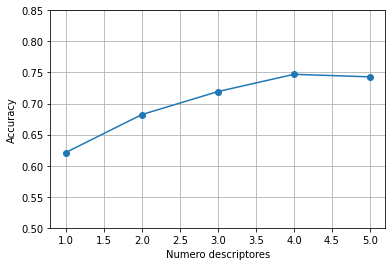

In [9]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat,sbs.scores_,marker='o')
plt.ylim([0.5,0.85])
plt.ylabel('Accuracy')
plt.xlabel('Numero descriptores')
plt.grid()
plt.show()

Según la gráfica la precisión aumenta al eliminar un descriptor. Lo eliminamos y observamos los cambios.

In [10]:
k4 = list(sbs.subsets_[1]) 
print(df_train.columns[1:][k4])

forest.fit(trainData,trainLabels)
print('Training accuracy:', forest.score(trainData,trainLabels))
print('Test accuracy:', forest.score(testData,testLabels))

forest.fit(trainData_norm,trainLabels)
print('Training accuracy:', forest.score(trainData_norm,trainLabels))
print('Test accuracy:', forest.score(testData_norm,testLabels))

forest.fit(trainData_std,trainLabels)
print('Training accuracy:', forest.score(trainData_std,trainLabels))
print('Test accuracy:', forest.score(testData_std,testLabels))

forest.fit(trainData_std[:,k4],trainLabels)
print('Training accuracy:', forest.score(trainData_std[:,k4],trainLabels))
print('Test accuracy:', forest.score(testData_std[:,k4],testLabels))

Index(['EEG', 'HR', 'CIRCULATION', 'ACTIVITY'], dtype='object')
Training accuracy: 0.9974997684970831
Test accuracy: 0.7425
Training accuracy: 0.9977775719974071
Test accuracy: 0.74
Training accuracy: 0.9977775719974071
Test accuracy: 0.7366666666666667
Training accuracy: 0.9899990739883322
Test accuracy: 0.7483333333333333


De acuerdo a la selección de descriptores el modelo adecuado es el estandarizado con 4 de los 5 descriptores. Veamos resultados.

In [11]:
forest = RandomForestClassifier(min_samples_split=3,criterion='entropy',random_state=84)
forest.fit(trainData_std[:,k4], trainLabels)
evalua(forest,testData_std[:,k4],testLabels)

Cambian 302 de 1200
